<a href="https://colab.research.google.com/github/miltiadiss/Data-Mining/blob/main/question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ερώτημα 3**

**3.1 Αλγόριθμος KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

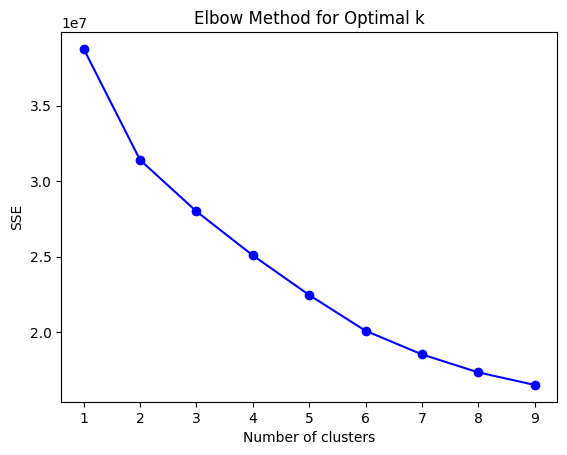

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ορισμός του φακέλου που περιέχει τα αρχεία CSV
path = '/content/drive/MyDrive/harth'

# Λίστες για την αποθήκευση των δεδομένων από όλα τα αρχεία
all_data = []
# Λίστα για τα ονόματα των αρχείων
file_names = []
# Λίστες για τις μέσες τιμές από κάθε αρχείο
mean_values_list = []

# Διάβασμα των αρχείων στο φάκελο
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))
        file_names.append(filename)  # Κρατάμε το όνομα του αρχείου για κάθε δείγμα

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
        X = df[columns]

        # Αποθήκευση των δεδομένων στη λίστα
        all_data.append(X)

        # Υπολογισμός μέσης τιμής κάθε στήλης
        mean_values = X.mean().values

        # Προσθήκη των μέσων τιμών στη λίστα
        mean_values_list.append(mean_values)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
all_data_combined = np.concatenate(all_data, axis=0)

# Κανονικοποίηση των πλήρων δεδομένων
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data_combined)

# Υπολογισμός του SSE για διαφορετικούς αριθμούς συστάδων
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_data_scaled)
    sse.append(kmeans.inertia_)

# Σχεδίαση της καμπύλης SSE
plt.plot(range(1, 10), sse, marker='o', color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

# Επιλογή κατάλληλου πληθους συστάδων
optimal = 3

# Εφαρμογή του αλγορίθμου k-means
kmeans = KMeans(n_clusters=optimal, random_state=42)  # Ορισμός αριθμού συστάδων και τυχαίας κατάστασης για επαναληψιμότητα
kmeans.fit(all_data_scaled)

# Εκτύπωση των κέντρων των συστάδων (clusters)
print("Cluster Centers:")
for center in kmeans.cluster_centers_:
    print(center)

# Δημιουργία DataFrame με τα ονόματα των αρχείων ως δείκτες και τις μέσες τιμές ως δεδομένα
mean_values_df = pd.DataFrame(mean_values_list, columns=columns, index=file_names)

# Κανονικοποίηση των μέσων τιμών
scaler = StandardScaler()
mean_values_scaled = scaler.fit_transform(mean_values_df)

# Προβλέψεις για τις συστάδες των μέσων τιμών
cluster_assignments = kmeans.predict(mean_values_scaled)

# Δημιουργία DataFrame με τα αρχεία και τις αντίστοιχες συστάδες
clusters_df = pd.DataFrame({'filename': file_names, 'cluster': cluster_assignments})

# Ομαδοποίηση και εκτύπωση των αρχείων ανά συστάδα
grouped = clusters_df.groupby('cluster')['filename'].apply(list)

print("\nPlacement of Participants in Clusters")
for cluster, files in grouped.items():
    print(f"Cluster {cluster}:")
    for file in files:
        # Χωρίς κατάληξη
        base_name = os.path.splitext(file)[0]
        print(f"  {base_name}")

# Υπολογισμός του Silhouette Score
silhouette_avg = silhouette_score(mean_values_scaled, cluster_assignments)
print(f"Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[-0.38195496 -0.07802592  0.1923045  -0.84522871 -0.12633215 -0.71296328]
[ 1.90404647  1.2372765   1.07283398  0.62173226 -0.82318124 -1.21469077]
[ 0.08235243 -0.08319561 -0.28097775  0.6057119   0.19854412  0.71597493]

Placement of Participants in Clusters
Cluster 0:
  S009
  S010
  S028
  S026
  S029
  S023
  S025
  S027
Cluster 1:
  S024
Cluster 2:
  S017
  S016
  S021
  S015
  S008
  S013
  S019
  S020
  S022
  S012
  S014
  S006
  S018
Silhouette Score: 0.2219287327166749


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[ 0.63199244  0.3980111  -1.16813884]
[-0.28774754 -0.00358566  0.41384503]
[ 1.950978   -3.46336172 -0.48884879]


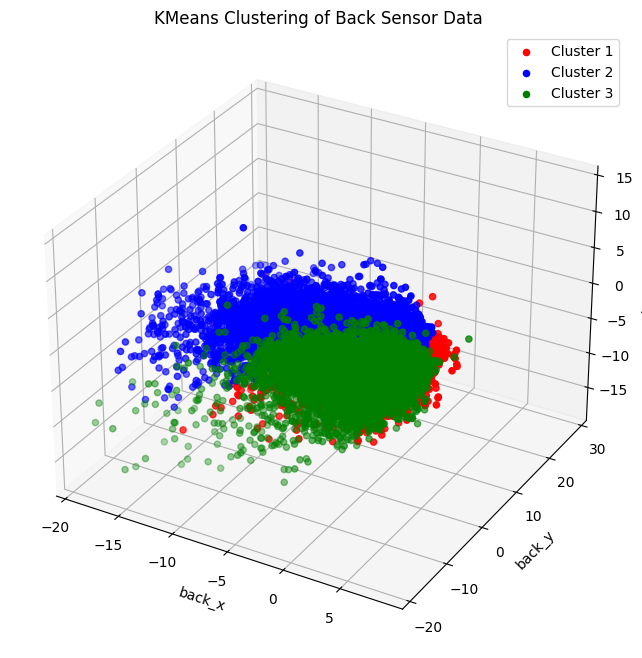


Placement of Participants in Clusters
Cluster 0:
  S016
  S015
  S026
  S008
  S019
  S020
  S006
  S024
Cluster 1:
  S017
  S009
  S021
  S010
  S028
  S029
  S013
  S023
  S022
  S012
  S014
  S027
  S018
Cluster 2:
  S025


In [ ]:
# Λίστα για τα ονόματα των αρχείων
file_names = []

# Λίστες για την αποθήκευση των δεδομένων του σένσορα πλάτης από όλα τα αρχεία
back_data = []

# Λίστες για τις μέσες τιμές των δεδομένων του σένσορα πλάτης από κάθε αρχείο
back_mean_values_list = []

# Διάβασμα των αρχείων στο φάκελο
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        columns = ['back_x', 'back_y', 'back_z']

        # Επιβεβαίωση ότι οι στήλες υπάρχουν στο αρχείο
        if all(col in df.columns for col in columns):
            X = df[columns]

            # Αποθήκευση των δεδομένων στη λίστα
            back_data.append(X)

            # Υπολογισμός μέσης τιμής κάθε στήλης
            back_mean_values = X.mean().values

            # Προσθήκη των μέσων τιμών στη λίστα
            back_mean_values_list.append(back_mean_values)

            # Κρατάμε το όνομα του αρχείου για κάθε δείγμα
            file_names.append(filename)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
back_data_combined = np.concatenate(back_data, axis=0)

# Κανονικοποίηση των δεδομένων
scaler = StandardScaler()
back_data_scaled = scaler.fit_transform(back_data_combined)

# Εφαρμογή του αλγορίθμου k-means
kmeans = KMeans(n_clusters=optimal, random_state=42)  # Ορισμός αριθμού συστάδων και τυχαίας κατάστασης για επαναληψιμότητα
kmeans.fit(back_data_scaled)

# Εκτύπωση των κέντρων των συστάδων (clusters)
print("Cluster Centers:")
for center in kmeans.cluster_centers_:
    print(center)

# Προβλέψεις για κάθε σημείο δεδομένων
labels = kmeans.labels_

# Οπτικοποίηση των συστάδων σε 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Χρωματική παλέτα για τις συστάδες
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'pink', 'grey']

# Δημιουργία 3D scatter plot για κάθε συστάδα
for cluster in range(optimal):
    cluster_data = back_data_scaled[labels == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster + 1}', color=colors[cluster])

ax.set_xlabel('back_x')
ax.set_ylabel('back_y')
ax.set_zlabel('back_z')
ax.set_title('KMeans Clustering of Back Sensor Data')
ax.legend()
plt.show()

# Δημιουργία DataFrame με τα ονόματα των αρχείων ως δείκτες και τις μέσες τιμές ως δεδομένα
back_mean_values_df = pd.DataFrame(back_mean_values_list, columns=columns, index=file_names)

# Κανονικοποίηση των μέσων τιμών
scaler = StandardScaler()
back_mean_values_scaled = scaler.fit_transform(back_mean_values_df)

# Προβλέψεις για τις συστάδες των μέσων τιμών
cluster_assignments = kmeans.predict(back_mean_values_scaled)

# Δημιουργία DataFrame με τα αρχεία και τις αντίστοιχες συστάδες
clusters_df = pd.DataFrame({'filename': file_names, 'cluster': cluster_assignments})

# Ομαδοποίηση και εκτύπωση των αρχείων ανά συστάδα
grouped = clusters_df.groupby('cluster')['filename'].apply(list)

print("\nPlacement of Participants in Clusters")
for cluster, files in grouped.items():
    print(f"Cluster {cluster}:")
    for file in files:
        # Χωρίς κατάληξη
        base_name = os.path.splitext(file)[0]
        print(f"  {base_name}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[-0.6217236   0.07216152 -0.81567132]
[0.59188653 0.21971581 0.73072849]
[-0.94900892 -2.30729703 -0.86118157]


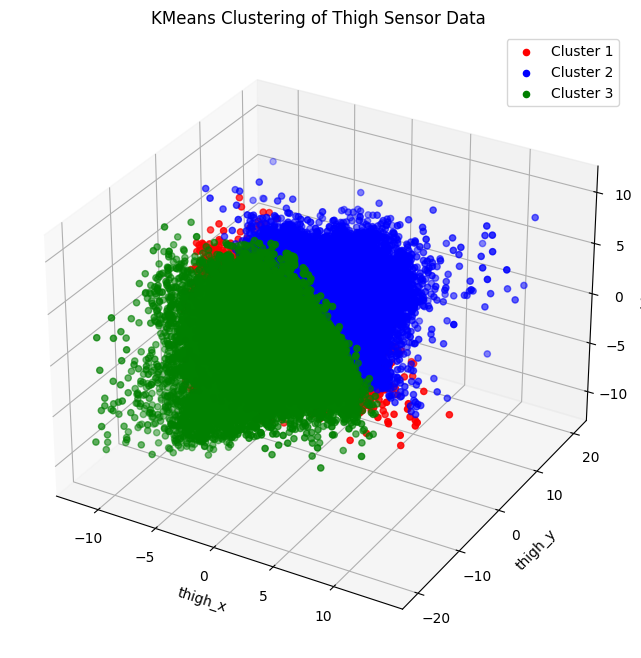


Placement of Participants in Clusters
Cluster 0:
  S009
  S010
  S028
  S023
  S025
  S024
Cluster 1:
  S017
  S016
  S021
  S015
  S008
  S013
  S019
  S020
  S022
  S012
  S014
  S006
  S018
Cluster 2:
  S026
  S029
  S027


In [ ]:
# Λίστα για τα ονόματα των αρχείων
file_names = []

# Λίστες για την αποθήκευση των δεδομένων του σένσορα μηρού από όλα τα αρχεία
thigh_data = []

# Λίστες για τις μέσες τιμές των δεδομένων του σένσορα μηρού από κάθε αρχείο
thigh_mean_values_list = []

# Διάβασμα των αρχείων στο φάκελο
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Διάβασμα του CSV αρχείου
        df = pd.read_csv(os.path.join(path, filename))

        # Επιλογή των συγκεκριμένων χαρακτηριστικών
        columns = ['thigh_x', 'thigh_y', 'thigh_z']

        # Επιβεβαίωση ότι οι στήλες υπάρχουν στο αρχείο
        if all(col in df.columns for col in columns):
            X = df[columns]

            # Αποθήκευση των δεδομένων στη λίστα
            thigh_data.append(X)

            # Υπολογισμός μέσης τιμής κάθε στήλης
            thigh_mean_values = X.mean().values

            # Προσθήκη των μέσων τιμών στη λίστα
            thigh_mean_values_list.append(thigh_mean_values)

            # Κρατάμε το όνομα του αρχείου για κάθε δείγμα
            file_names.append(filename)

# Συνδυασμός όλων των δεδομένων σε ένα συνολικό πίνακα
thigh_data_combined = np.concatenate(thigh_data, axis=0)

# Κανονικοποίηση των δεδομένων
scaler = StandardScaler()
thigh_data_scaled = scaler.fit_transform(thigh_data_combined)

# Εφαρμογή του αλγορίθμου k-means
kmeans = KMeans(n_clusters=optimal, random_state=42)  # Ορισμός αριθμού συστάδων και τυχαίας κατάστασης για επαναληψιμότητα
kmeans.fit(thigh_data_scaled)

# Εκτύπωση των κέντρων των συστάδων (clusters)
print("Cluster Centers:")
for center in kmeans.cluster_centers_:
    print(center)

# Προβλέψεις για κάθε σημείο δεδομένων
labels = kmeans.labels_

# Οπτικοποίηση των συστάδων σε 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Χρωματική παλέτα για τις συστάδες
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'pink', 'grey']

# Δημιουργία 3D scatter plot για κάθε συστάδα
for cluster in range(optimal):
    cluster_data = thigh_data_scaled[labels == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster + 1}', color=colors[cluster])

ax.set_xlabel('thigh_x')
ax.set_ylabel('thigh_y')
ax.set_zlabel('thigh_z')
ax.set_title('KMeans Clustering of Thigh Sensor Data')
ax.legend()
plt.show()

# Δημιουργία DataFrame με τα ονόματα των αρχείων ως δείκτες και τις μέσες τιμές ως δεδομένα
thigh_mean_values_df = pd.DataFrame(thigh_mean_values_list, columns=columns, index=file_names)

# Κανονικοποίηση των μέσων τιμών
scaler = StandardScaler()
thigh_mean_values_scaled = scaler.fit_transform(thigh_mean_values_df)

# Προβλέψεις για τις συστάδες των μέσων τιμών
cluster_assignments = kmeans.predict(thigh_mean_values_scaled)

# Δημιουργία DataFrame με τα αρχεία και τις αντίστοιχες συστάδες
clusters_df = pd.DataFrame({'filename': file_names, 'cluster': cluster_assignments})

# Ομαδοποίηση και εκτύπωση των αρχείων ανά συστάδα
grouped = clusters_df.groupby('cluster')['filename'].apply(list)

print("\nPlacement of Participants in Clusters")
for cluster, files in grouped.items():
    print(f"Cluster {cluster}:")
    for file in files:
        # Χωρίς κατάληξη
        base_name = os.path.splitext(file)[0]
        print(f"  {base_name}")

**3.2 Δίκτυο Kohonen**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Placement of Participants in Clusters
Cluster 0:
  S017
  S009
  S015
  S018
Cluster 1:
  S021
  S010
  S008
  S013
  S019
  S020
  S022
  S012
  S014
Cluster 2:
  S016
  S029
  S025
  S027
  S006
  S024
Cluster 3:
  S028
  S026
  S023


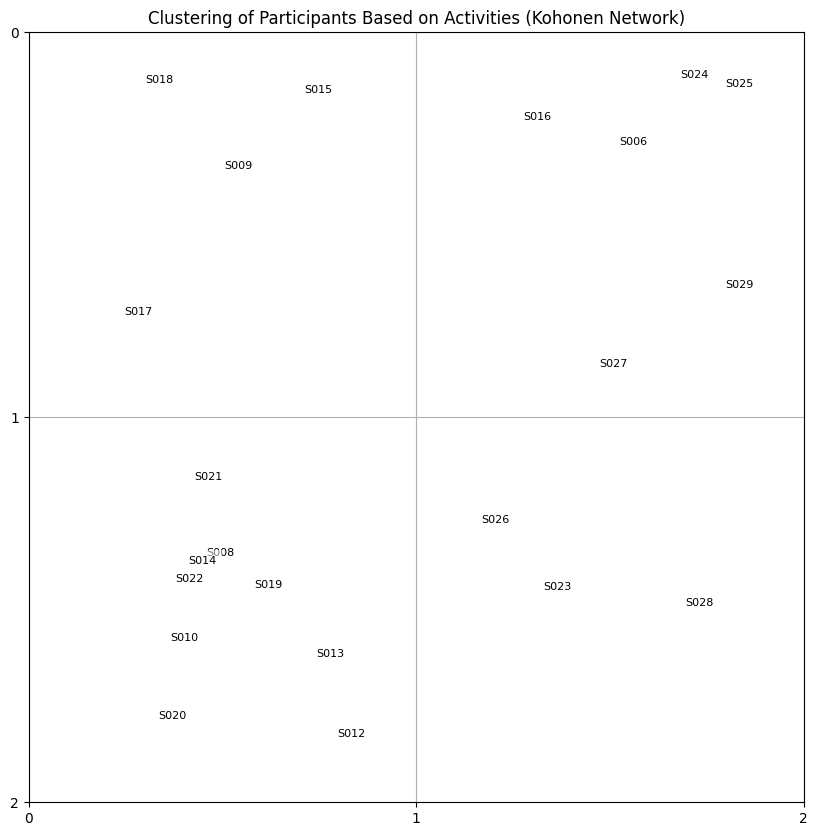

Silhouette Score: 0.014991320964023187


In [10]:
from minisom import MiniSom

# Ορισμός παραμέτρων για το SOM
som_size = 2  # Καθορίζουμε το πλήθος των συστάδων που θα κατασκευάσουμε
som = MiniSom(som_size, som_size, len(columns), sigma=0.5, learning_rate=0.5, random_seed=42) # som_size: μέγεθος του πλέγματος SOM (10x10), sigma: διασπορά της συνάρτησης γειτονιάς (0.5), learning_rate: αρχικός ρυθμός εκμάθησης (0.5)

# Εκπαίδευση του SOM
som.train_random(all_data_scaled, 100)  # 100 επαναλήψεις του αλγορίθμου

# Ανάθεση κάθε συμμετέχοντα σε μια συστάδα
cluster_assignments = []
mean_values_scaled = scaler.transform([np.mean(X, axis=0) for X in all_data])
for i, x in enumerate(mean_values_scaled):
    # x: κλιμακωμένη μέση τιμή του τρέχοντος στοιχείου
    # win_position: θέση του νικητή στο SOM
    win_position = som.winner(x)
    cluster_assignments.append((file_names[i], win_position))

# Δημιουργία λεξικού για τις συστάδες
cluster_dict = {i: [] for i in range(som_size * som_size)}
for file_name, cluster in cluster_assignments:
    cluster_index = cluster[0] * som_size + cluster[1]
    cluster_dict[cluster_index].append(file_name)

# Εκτύπωση των τελικών συστάδων
print("\nPlacement of Participants in Clusters")
for cluster, files in cluster_dict.items():
    print(f"Cluster {cluster}:")
    for file in files:
       base_name = os.path.splitext(file)[0]
       print(f"  {base_name}")

# Οπτικοποίηση του SOM
plt.figure(figsize=(10, 10))
for file_name, (x, y) in cluster_assignments:
    offset_x = np.random.uniform(-0.4, 0.4)
    offset_y = np.random.uniform(-0.4, 0.4)
    base_name = os.path.splitext(file_name)[0]
    plt.text(x + 0.5 + offset_x, y + 0.5 + offset_y, base_name, fontsize=8, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))

# Προσθέτουμε τα περιγράμματα για τα κελιά του SOM
plt.xlim([0, som_size])
plt.ylim([0, som_size])
plt.xticks(np.arange(som_size+1))
plt.yticks(np.arange(som_size+1))
plt.grid()
plt.title('Clustering of Participants Based on Activities (Kohonen Network)')
plt.gca().invert_yaxis()  # Αντιστρέφουμε τον άξονα y για καλύτερη απεικόνιση
plt.show()

# Μετατροπή των συστάδων από θέσεις στο SOM σε μοναδικούς αριθμούς συστάδων
labels = [cluster[0] * som_size + cluster[1] for _, cluster in cluster_assignments]

# Υπολογισμός του Silhouette Score
silhouette_avg = silhouette_score(mean_values_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

**3.3 Gaussian Mixture**

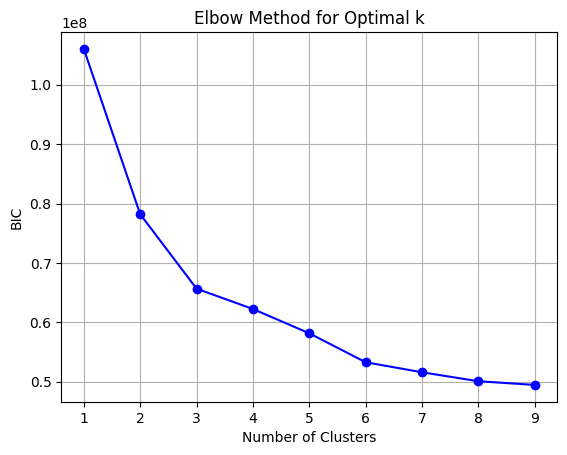

In [ ]:
from sklearn.mixture import GaussianMixture
from collections import Counter

inertia = [] # Λίστα για την αποθήκευση των inertia για κάθε αριθμό συστάδων

# Δοκιμάζουμε διαφορετικούς αριθμούς συστάδων
for k in range(1, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(all_data_scaled)
    inertia.append(gmm.bic(all_data_scaled))  # Χρησιμοποιούμε το Bayesian Information Criterion (BIC) ως μέτρο αξιολόγησης

# Οπτικοποίηση του Elbow Method
plt.plot(range(1, 10), inertia, marker='o', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

Cluster Centers (GMM):
Cluster 1: [-0.19555186 -0.01402299  0.30042484 -0.60045127 -0.01583482 -0.65839864]
Cluster 2: [ 0.30136117 -0.15948463  0.06424919 -0.33767086 -0.14190394 -0.53312885]
Cluster 3: [-0.10534744  0.12388885 -0.22083051  0.59325248  0.11217892  0.76872057]

Placement of Participants in Clusters (GMM):
Cluster 0:
  S009
  S010
  S028
  S027
Cluster 1:
  S026
  S029
  S023
  S025
  S022
  S024
Cluster 2:
  S017
  S016
  S021
  S015
  S008
  S013
  S019
  S020
  S012
  S014
  S006
  S018


<ipython-input-11-15989c7ff859>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels)).colors


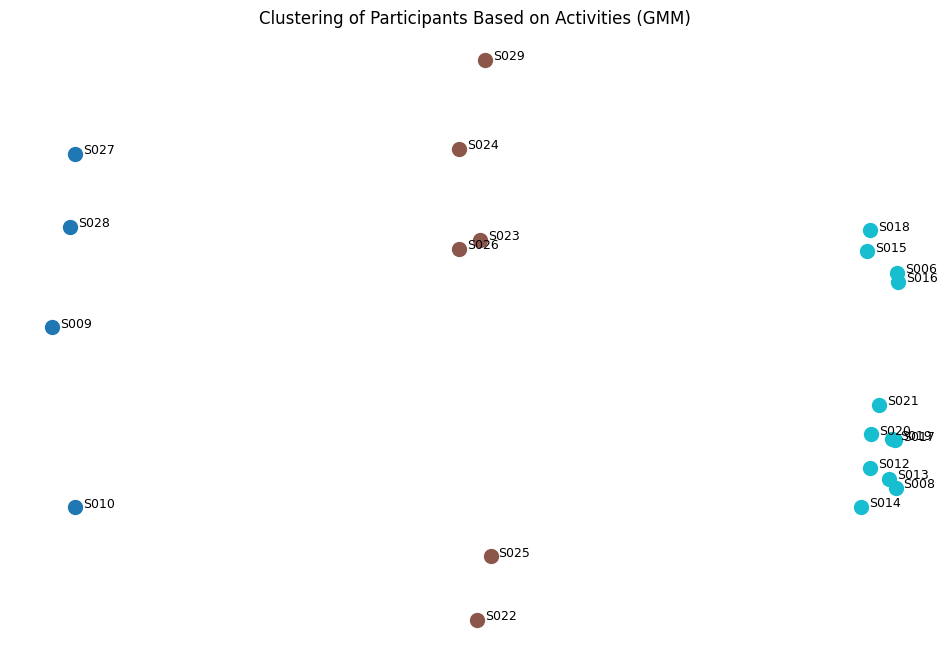


Silhouette Score for GMM: 0.2837100937215892


In [11]:
# Επιλογή κατάλληλου πληθους συστάδων
optimal = 3

# Εφαρμογή του Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal, random_state=42)
gmm.fit(all_data_scaled)

# Εκτύπωση των κεντροειδών των συστάδων
print("Cluster Centers (GMM):")
for i, center in enumerate(gmm.means_):
    print(f"Cluster {i + 1}: {center}")

# Δημιουργία DataFrame με τις μέσες τιμές για κάθε συμμετέχοντα
mean_values_list = [np.mean(data, axis=0) for data in all_data]
mean_values_df = pd.DataFrame(mean_values_list, columns=columns, index=[os.path.splitext(f)[0] for f in file_names])

# Κανονικοποίηση των μέσων τιμών
scaler = StandardScaler()
mean_values_scaled = scaler.fit_transform(mean_values_df)

# Υπολογισμός αποστάσεων από τα κεντροειδή
distances = np.linalg.norm(mean_values_scaled[:, np.newaxis] - gmm.means_, axis=2)

# Αντιστοίχιση κάθε συμμετέχοντα στη συστάδα με την ελάχιστη απόσταση
cluster_assignments = np.argmin(distances, axis=1)

# Δημιουργία DataFrame με τα αρχεία και τις αντίστοιχες συστάδες
clusters_df = pd.DataFrame({'filename': mean_values_df.index, 'cluster': cluster_assignments})

# Ομαδοποίηση και εκτύπωση των αρχείων ανά συστάδα
grouped = clusters_df.groupby('cluster')['filename'].apply(list)

print("\nPlacement of Participants in Clusters (GMM):")
for cluster, files in grouped.items():
    print(f"Cluster {cluster}:")
    for file in files:
        print(f"  {file}")

# Οπτικοποίηση των συστάδων και των σημείων των συμμετεχόντων
plt.figure(figsize=(12, 8))

# Δημιουργία χρωματικής παλέτας για τις συστάδες
unique_labels = set(cluster_assignments)
colors = plt.cm.get_cmap('tab10', len(unique_labels)).colors

# Προσθήκη των σημείων στις συντεταγμένες ανά συστάδα
for i, assignment in enumerate(cluster_assignments):
    cluster = assignment
    x = cluster + np.random.rand() * 0.1 - 0.05  # Μικρή τυχαία μετατόπιση
    y = np.random.rand() * 0.1 - 0.05  # Μικρή τυχαία μετατόπιση
    plt.scatter(x, y, s=100, color=colors[cluster % len(colors)], label=f'Cluster {cluster + 1}' if i == 0 else "")
    plt.text(x + 0.02, y, clusters_df['filename'][i], fontsize=9, ha='left')  # Σταθερή μετατόπιση για την ετικέτα

# Προσθήκη υπομνήματος
for cluster in unique_labels:
    plt.scatter([], [], color=colors[cluster % len(colors)], label=f'Cluster {cluster + 1}')

plt.title('Clustering of Participants Based on Activities (GMM)')
plt.axis('off')
plt.show()

# Υπολογισμός του Silhouette Score
silhouette_avg = silhouette_score(mean_values_scaled, cluster_assignments)
print(f"\nSilhouette Score for GMM: {silhouette_avg}")